In [2]:
import numpy as np
import matplotlib.pyplot as plt

1. Sum of two uniformly distributed random variables
   
   As we expect from theory, the result should be distributed as the convolution of their distributions. In this case, the result is a triangle-shaped distributed, ranging from 0 to 2

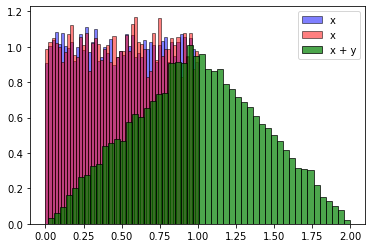

In [9]:
rng = np.random.default_rng()
N = 10000
x = rng.uniform(0, 1, N)
y = rng.uniform(0, 1, N)

plt.hist(x, ec="k", color="b", bins=50, label="x", alpha=0.5, density=True)
plt.hist(y, ec="k", color="r", bins=50, label="x", alpha=0.5, density=True)
plt.hist(x + y, ec="k", color="g", bins=50, label="x + y", alpha=0.7, density=True)
plt.legend()

2. Assume normally distributed variables

$$
X \sim \mathcal{N}(\mu_x, \sigma_x^2) \\
Y \sim \mathcal{N}(\mu_y, \sigma_y^2)
$$

It is really easy to see that, using the given parameters, $f_X(0) = \frac{1}{\sqrt{2\pi}}$ and $f_Y(0) = \frac{1}{\sqrt{2\pi e}}$

In [10]:
print(1/np.sqrt(2*np.pi))
print(1/np.sqrt(2*np.pi*np.e))

0.3989422804014327
0.24197072451914337


Now, we consider a mixture distribution
$$
f_Z(z) = 0.5 f_X(z) + 0.5 f_Y(z)
$$

In [31]:
def mixture(N, alpha=0.5, locs=(0, 1), scales=(1, 1)):
    rng = np.random.default_rng()
    mask = (rng.uniform(size=N) > alpha)
    z = np.zeros(N)
    z[mask] = rng.normal(loc=locs[0], scale=scales[0], size=z[mask].size)
    z[~mask] = rng.normal(loc=locs[1], scale=scales[1], size=z[~mask].size)
    return z

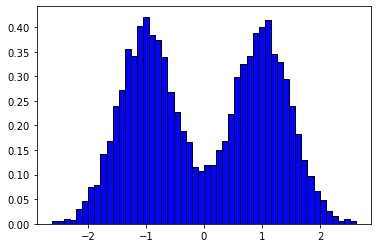

In [40]:
Z = mixture(10000, locs=(-1, 1), scales=(0.5, 0.5))
# Z = mixture(10000)

_ = plt.hist(Z, ec="k", color="b", bins=50, density=True)

How do we calculate the probability if observing $z = 0$?

Refresher on conditional probabilities:

$$
P(A|B) = \frac{P(A\cap B)}{P(B)} \\
P(B|A) = \frac{P(A\cap B)}{P(A)}
$$

Combining both:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

In general, we also haev $P(B) = P(A \cap B) + P(A' \cap B)$, thus:

$$
\overbrace{P(A|B)}^{\text{posterior}} = \frac{P(B|A)P(A)}{P(A \cap B) + P(A' \cap B)} = \frac{P(B|A)\overbrace{P(A)}^{\text{prior}}}{P(B|A)P(A) + P(B|A')P(A')}
$$

which is **Bayes' Theorem**.

Back to our problem:

Define binary variable $W \in \{ 0,1 \}$ where $w=0$ means we sample from $f_X$ and $w=1$, from $f_Y$. In our case, $P(w=0)=P(w=1)=0.5$

$$
P(Z=z|W=0) = f_X(z) \\
P(Z=z|W=1) = f_Y(z)
$$

Given that we observed $z=0$, the probability of having sampled from $f_X$ is simply $P(W=0|Z=0)$. Invoking Bayes' Theorem:

$$
P(W=0|Z=0) = \frac{P(Z=0|W=0)P(W=0)}{P(Z=0|W=0)P(W=0) + P(Z=0|W=1)P(W=1)} = \frac{0.5f_X(0)}{0.5f_X(0) + 0.5f_Y(0)} = \frac{f_X(0)}{f_X(0) + f_Y(0)}
$$




3. Notice that since each distribution have different ranges, the histograms for even weights are such that the area of each mode is the same! This implies the wider $[4, 6]$ distribution having half the height of the narrower $[0, 1]$.



In [57]:
def uniform_mixture(N, alpha=0.5):
    rng = np.random.default_rng()
    mask = (rng.uniform(size=N) > alpha)
    z = np.zeros(N)
    z[mask] = rng.uniform(0, 1, size=z[mask].size)
    z[~mask] = rng.uniform(4, 6, size=z[~mask].size)
    return z

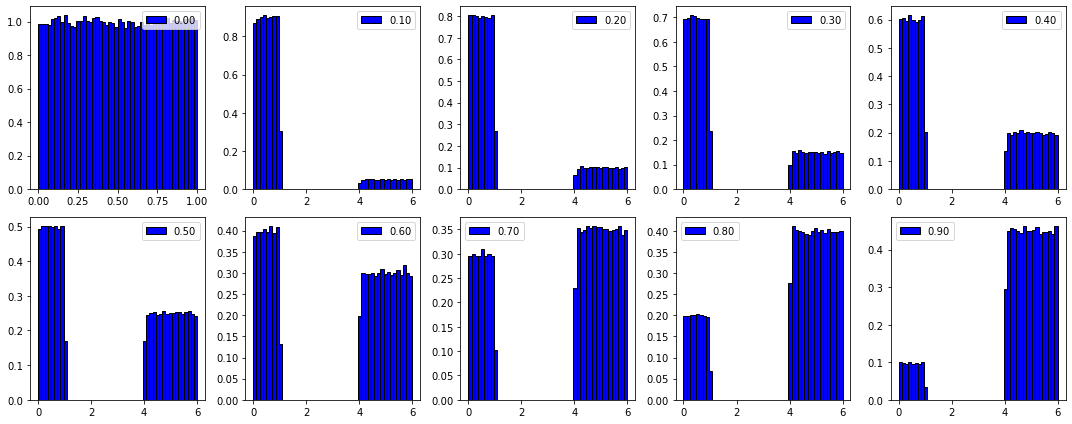

In [63]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

N = 100000
alphas = np.linspace(0, 1, 11)
count = 0
for i in range(2):
    for j in range(5):
        alpha = alphas[count]
        Z = uniform_mixture(N, alpha)
        ax[i, j].hist(Z, label=f"{alpha:.2f}", density=True, bins=50, ec="k", color="b") 
        ax[i, j].legend()
        fig.tight_layout()
        count += 1